<a href="https://colab.research.google.com/github/lorenzo-arcioni/soccer_stats/blob/main/Serie-A-stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New stats on Serie-A matches

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import math as mt

#Useful function for displaying more data
pd.set_option('display.max_columns', 200)

In [2]:
filename_1 = "Serie-A-2122.csv"
filename_2 = "Serie-A-2223.csv"
filename_3 = "Premier-league-2122.csv"
filename_4 = "Premier-league-2223.csv"
filename_5 = "Bundesliga-2122.csv"
filename_6 = "Bundesliga-2223.csv"
filename_7 = "Liga-2122.csv"
filename_8 = "Liga-2223.csv"
filename_9  = "Ligue1-2122.csv"
filename_10 = "Ligue1-2223.csv"
filename_11 = "Super-lig-2122.csv"
filename_12 = "Super-lig-2223.csv"
filename_13 = "Eredivise-2122.csv"
filename_14 = "Eredivise-2223.csv"
filename_15 = "Liga-1-2122.csv"
filename_16 = "Liga-1-2223.csv"
filename_17 = "Serie-A-2021.csv"

europa_league = "Europa-league-2023.csv"

Aggiornamento dei datasets con i risultati aggiornati.

In [6]:
#Downloading old data
url = "https://www.football-data.co.uk/mmz4281/2122/I1.csv"
os.system("curl -o "+ filename_1 + " " + url)

#Downloading updated data
url = "https://www.football-data.co.uk/mmz4281/2223/I1.csv"
os.system("curl -o "+ filename_2 + " " + url)

#Downloading updated data
url = "https://www.football-data.co.uk/mmz4281/2021/I1.csv"
os.system("curl -o "+ filename_17 + " " + url)
#Downloading old data
url = "https://www.football-data.co.uk/mmz4281/2122/E0.csv"
os.system("curl -o "+ filename_3 + " " + url)

#Downloading updated data
url = "https://www.football-data.co.uk/mmz4281/2223/E0.csv"
os.system("curl -o "+ filename_4 + " " + url)

#Downloading old data
url = "https://www.football-data.co.uk/mmz4281/2122/D1.csv"
os.system("curl -o "+ filename_5 + " " + url)

#Downloading updated data
url = "https://www.football-data.co.uk/mmz4281/2223/D1.csv"
os.system("curl -o "+ filename_6 + " " + url)

#Downloading old data
url = "https://www.football-data.co.uk/mmz4281/2122/SP1.csv"
os.system("curl -o "+ filename_7 + " " + url)

#Downloading updated data
url = "https://www.football-data.co.uk/mmz4281/2223/SP1.csv"
os.system("curl -o "+ filename_8 + " " + url)

#Downloading old data
url = "https://www.football-data.co.uk/mmz4281/2122/F1.csv"
os.system("curl -o "+ filename_9 + " " + url)

#Downloading updated data
url = "https://www.football-data.co.uk/mmz4281/2223/F1.csv"
os.system("curl -o "+ filename_10 + " " + url)

#Downloading old data
url = "https://www.football-data.co.uk/mmz4281/2122/T1.csv"
os.system("curl -o "+ filename_11 + " " + url)

#Downloading updated data
url = "https://www.football-data.co.uk/mmz4281/2223/T1.csv"
os.system("curl -o "+ filename_12 + " " + url)

#Downloading old data
url = "https://www.football-data.co.uk/mmz4281/2122/N1.csv"
os.system("curl -o "+ filename_13 + " " + url)

#Downloading updated data
url = "https://www.football-data.co.uk/mmz4281/2223/N1.csv"
os.system("curl -o "+ filename_14 + " " + url)

#Downloading old data
url = "https://www.football-data.co.uk/mmz4281/2122/P1.csv"
os.system("curl -o "+ filename_15 + " " + url)

#Downloading updated data
url = "https://www.football-data.co.uk/mmz4281/2223/P1.csv"
os.system("curl -o "+ filename_16 + " " + url)

#Downloading updated data
url = "https://www.football-data.co.uk/notes.txt"
os.system("curl -o notes.txt " + url)

print("Done!")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  167k  100  167k    0     0   340k      0 --:--:-- --:--:-- --:--:--  341k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  150k  100  150k    0     0   206k      0 --:--:-- --:--:-- --:--:--  206k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  166k  100  166k    0     0   285k      0 --:--:-- --:--:-- --:--:--  286k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  171k  100  171k    0     0   331k      0 --:--:-- --:--:-- --:--:--  331k
  % Total    % Received % Xferd  Average Speed   Tim

Done!


100  6702  100  6702    0     0  14105      0 --:--:-- --:--:-- --:--:-- 14079


Caricamento dei dataframes

In [7]:
bm = 'PS'
H = bm + 'H'
D = bm + 'D'
A = bm + 'A'

k = 55.0

def get_best(s):

    h = s.FTHG
    a = s.FTAG

    BH = s[H + '_P']
    BD = s[D + '_P']
    BA = s[A + '_P']


    if BH == max(BH, BD, BA, k) and h > a or \
       BD == max(BH, BD, BA, k) and h == a or \
       BA == max(BH, BD, BA, k) and h < a :
        
        return 1
    
    return 0

#Loading the datasets
filenames = [filename_2]
df = pd.DataFrame()
for name in filenames:
    tmp = pd.read_csv(name, sep=',')
    df = pd.concat([df, tmp])
df.shape

(340, 105)

In [20]:
tmp_features = ['HomeTeam','AwayTeam','FTHG','FTAG', H, D, A]

df[H + '_P'] = round(100/(1 + df[H]*(1/df[D] + 1/df[A])), 2)
df[A + '_P'] = round(100/(1 + df[A]*(1/df[H] + 1/df[D])), 2)
df[D + '_P'] = round(100/(1 + df[D]*(1/df[H] + 1/df[A])), 2)

df[[H + '_P', D + '_P', A + '_P']].head()

,PSH_P,PSD_P,PSA_P
0,68.09,20.89,11.01
1,20.67,24.51,54.81
2,9.07,16.48,74.45
3,37.09,29.14,33.77
4,70.20,18.31,11.49


In [21]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,PSH_P,PSA_P,PSD_P
0,I1,13/08/2022,17:30,Milan,Udinese,4,2,H,2,2,D,14,9,5,4,16,13,5,1,1,4,0,0,1.44,4.75,7.00,1.41,4.75,7.50,1.4,4.80,8.5,1.43,4.66,8.84,1.38,4.60,8.50,1.36,4.6,9.00,1.46,5.10,9.00,1.41,4.75,8.14,1.72,2.10,1.77,2.16,1.82,2.21,1.73,2.14,-1.25,1.94,1.96,1.98,1.94,1.98,2.01,1.92,1.94,1.44,4.75,6.50,1.47,4.5,6.50,1.45,4.5,7.25,1.47,4.94,7.12,1.47,4.33,7.00,1.45,4.6,5.75,1.54,5.05,7.50,1.48,4.58,6.71,1.66,2.20,1.74,2.21,1.82,2.28,1.72,2.16,-1.25,1.98,1.92,2.02,1.91,2.17,1.94,2.06,1.81,68.09,11.01,20.89
1,I1,13/08/2022,17:30,Sampdoria,Atalanta,0,2,A,0,1,A,11,9,1,3,13,21,3,2,4,6,0,0,4.33,3.90,1.75,4.33,3.80,1.77,4.3,3.90,1.8,4.72,3.98,1.78,4.50,3.80,1.73,4.75,3.7,1.73,4.75,4.12,1.84,4.45,3.91,1.77,1.72,2.10,1.73,2.22,1.76,2.26,1.69,2.18,0.75,1.90,2.00,1.93,1.99,1.93,2.02,1.88,1.97,5.25,4.00,1.61,4.80,3.9,1.68,4.80,3.8,1.73,5.60,4.13,1.66,5.50,3.80,1.62,5.75,4.0,1.57,5.75,4.30,1.73,5.29,4.06,1.64,1.66,2.20,1.69,2.29,1.73,2.35,1.67,2.24,0.75,2.07,1.83,2.11,1.82,2.13,1.87,2.06,1.82,20.67,54.81,24.51
2,I1,13/08/2022,19:45,Lecce,Inter,1,2,A,0,1,A,10,19,4,9,21,19,6,8,4,2,0,0,10.00,5.75,1.28,9.75,5.50,1.30,9.5,5.75,1.3,10.75,5.92,1.31,11.00,5.50,1.27,12.00,5.5,1.25,12.00,6.15,1.33,10.22,5.67,1.30,1.57,2.37,1.61,2.46,1.65,2.46,1.60,2.37,1.50,2.01,1.89,2.07,1.86,2.07,1.92,2.00,1.87,8.00,5.25,1.36,9.75,5.5,1.30,7.75,5.5,1.37,8.66,5.55,1.37,9.00,5.00,1.33,10.00,5.5,1.30,10.00,5.70,1.38,8.53,5.41,1.35,1.53,2.50,1.55,2.60,1.58,2.70,1.52,2.55,1.50,1.90,2.00,1.91,2.02,1.96,2.06,1.89,1.97,9.07,74.45,16.48
3,I1,13/08/2022,19:45,Monza,Torino,1,2,A,0,1,A,15,13,4,6,6,17,2,7,1,2,0,0,2.60,3.30,2.75,2.55,3.25,2.80,2.6,3.30,2.8,2.64,3.36,2.90,2.50,3.25,2.80,2.55,3.1,2.88,2.68,3.48,2.94,2.58,3.29,2.84,2.10,1.72,2.09,1.83,2.21,1.84,2.09,1.76,0.00,1.84,2.06,1.87,2.06,1.87,2.08,1.84,2.04,2.55,3.10,2.90,2.60,3.2,2.75,2.55,3.2,2.85,2.56,3.30,3.05,2.55,3.10,2.88,2.55,3.1,2.90,2.81,3.38,3.05,2.57,3.22,2.90,2.10,1.72,2.10,1.81,2.19,1.83,2.10,1.75,0.00,1.79,2.11,1.80,2.15,1.88,2.16,1.83,2.06,37.09,33.77,29.14
4,I1,14/08/2022,17:30,Fiorentina,Cremonese,3,2,H,2,1,H,27,13,11,4,10,19,11,4,0,3,0,1,1.36,5.00,8.50,1.39,4.80,7.75,1.4,5.00,7.5,1.39,5.33,8.49,1.36,4.60,9.00,1.33,4.8,9.50,1.42,5.40,9.50,1.38,5.02,8.16,1.66,2.20,1.63,2.40,1.70,2.40,1.63,2.25,-1.25,1.85,2.05,1.85,2.08,1.88,2.08,1.85,2.02,1.60,4.20,5.25,1.58,4.1,5.50,1.63,4.2,5.25,1.62,4.35,5.64,1.57,4.00,5.80,1.57,4.1,5.75,1.64,4.75,6.50,1.59,4.22,5.62,1.80,2.00,1.82,2.09,1.82,2.20,1.77,2.09,-1.00,2.02,1.88,2.06,1.87,2.07,1.97,1.99,1.87,70.20,11.49,18.31


In [22]:
df[bm + '_income_index'] = df.apply(get_best, axis=1)
df[bm + '_income_index'].value_counts()

PS_income_index
0    244
1     86
Name: count, dtype: int64

In [23]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,PSH_P,PSA_P,PSD_P,PS_income_index
0,I1,13/08/2022,17:30,Milan,Udinese,4,2,H,2,2,D,14,9,5,4,16,13,5,1,1,4,0,0,1.44,4.75,7.00,1.41,4.75,7.50,1.4,4.80,8.5,1.43,4.66,8.84,1.38,4.60,8.50,1.36,4.6,9.00,1.46,5.10,9.00,1.41,4.75,8.14,1.72,2.10,1.77,2.16,1.82,2.21,1.73,2.14,-1.25,1.94,1.96,1.98,1.94,1.98,2.01,1.92,1.94,1.44,4.75,6.50,1.47,4.5,6.50,1.45,4.5,7.25,1.47,4.94,7.12,1.47,4.33,7.00,1.45,4.6,5.75,1.54,5.05,7.50,1.48,4.58,6.71,1.66,2.20,1.74,2.21,1.82,2.28,1.72,2.16,-1.25,1.98,1.92,2.02,1.91,2.17,1.94,2.06,1.81,68.09,11.01,20.89,1
1,I1,13/08/2022,17:30,Sampdoria,Atalanta,0,2,A,0,1,A,11,9,1,3,13,21,3,2,4,6,0,0,4.33,3.90,1.75,4.33,3.80,1.77,4.3,3.90,1.8,4.72,3.98,1.78,4.50,3.80,1.73,4.75,3.7,1.73,4.75,4.12,1.84,4.45,3.91,1.77,1.72,2.10,1.73,2.22,1.76,2.26,1.69,2.18,0.75,1.90,2.00,1.93,1.99,1.93,2.02,1.88,1.97,5.25,4.00,1.61,4.80,3.9,1.68,4.80,3.8,1.73,5.60,4.13,1.66,5.50,3.80,1.62,5.75,4.0,1.57,5.75,4.30,1.73,5.29,4.06,1.64,1.66,2.20,1.69,2.29,1.73,2.35,1.67,2.24,0.75,2.07,1.83,2.11,1.82,2.13,1.87,2.06,1.82,20.67,54.81,24.51,0
2,I1,13/08/2022,19:45,Lecce,Inter,1,2,A,0,1,A,10,19,4,9,21,19,6,8,4,2,0,0,10.00,5.75,1.28,9.75,5.50,1.30,9.5,5.75,1.3,10.75,5.92,1.31,11.00,5.50,1.27,12.00,5.5,1.25,12.00,6.15,1.33,10.22,5.67,1.30,1.57,2.37,1.61,2.46,1.65,2.46,1.60,2.37,1.50,2.01,1.89,2.07,1.86,2.07,1.92,2.00,1.87,8.00,5.25,1.36,9.75,5.5,1.30,7.75,5.5,1.37,8.66,5.55,1.37,9.00,5.00,1.33,10.00,5.5,1.30,10.00,5.70,1.38,8.53,5.41,1.35,1.53,2.50,1.55,2.60,1.58,2.70,1.52,2.55,1.50,1.90,2.00,1.91,2.02,1.96,2.06,1.89,1.97,9.07,74.45,16.48,1
3,I1,13/08/2022,19:45,Monza,Torino,1,2,A,0,1,A,15,13,4,6,6,17,2,7,1,2,0,0,2.60,3.30,2.75,2.55,3.25,2.80,2.6,3.30,2.8,2.64,3.36,2.90,2.50,3.25,2.80,2.55,3.1,2.88,2.68,3.48,2.94,2.58,3.29,2.84,2.10,1.72,2.09,1.83,2.21,1.84,2.09,1.76,0.00,1.84,2.06,1.87,2.06,1.87,2.08,1.84,2.04,2.55,3.10,2.90,2.60,3.2,2.75,2.55,3.2,2.85,2.56,3.30,3.05,2.55,3.10,2.88,2.55,3.1,2.90,2.81,3.38,3.05,2.57,3.22,2.90,2.10,1.72,2.10,1.81,2.19,1.83,2.10,1.75,0.00,1.79,2.11,1.80,2.15,1.88,2.16,1.83,2.06,37.09,33.77,29.14,0
4,I1,14/08/2022,17:30,Fiorentina,Cremonese,3,2,H,2,1,H,27,13,11,4,10,19,11,4,0,3,0,1,1.36,5.00,8.50,1.39,4.80,7.75,1.4,5.00,7.5,1.39,5.33,8.49,1.36,4.60,9.00,1.33,4.8,9.50,1.42,5.40,9.50,1.38,5.02,8.16,1.66,2.20,1.63,2.40,1.70,2.40,1.63,2.25,-1.25,1.85,2.05,1.85,2.08,1.88,2.08,1.85,2.02,1.60,4.20,5.25,1.58,4.1,5.50,1.63,4.2,5.25,1.62,4.35,5.64,1.57,4.00,5.80,1.57,4.1,5.75,1.64,4.75,6.50,1.59,4.22,5.62,1.80,2.00,1.82,2.09,1.82,2.20,1.77,2.09,-1.00,2.02,1.88,2.06,1.87,2.07,1.97,1.99,1.87,70.20,11.49,18.31,1


In [24]:
df[df[bm + '_income_index'] == 1][[bm + 'H', bm + 'D', bm + 'A']].apply(lambda x: min(x[bm + 'H'], x[bm + 'D'], x[bm + 'A']), axis=1).mean()

1.502093023255814

In [25]:
df[bm + '_income_index'].fillna(0, inplace=True)
features = [H, D, A]
target = [bm + '_income_index']
df.dropna(inplace=True)

Train/test split

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = np.concatenate((df[features].to_numpy(), df[features].to_numpy()))
y = np.concatenate((df[target].to_numpy(),   df[target].to_numpy())).squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

KNN

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create Decision Tree classifer object
clf = KNeighborsClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       271
           1       0.75      0.80      0.77       162

    accuracy                           0.82       433
   macro avg       0.81      0.82      0.81       433
weighted avg       0.83      0.82      0.83       433



In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [x for x in range(1, 30)],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [8]
}

# definizione del metodo di ricerca migliore combinazione di iper-parametri
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, n_jobs=8)

grid_search.fit(X_test, y_test)

# stampa dei migliori parametri e punteggi ottenuti
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters:  {'algorithm': 'auto', 'n_jobs': 8, 'n_neighbors': 15, 'weights': 'distance'}
Best cross-validation score: 0.85
Test set score: 1.00


In [25]:
# Create KNN object
clf = KNeighborsClassifier(algorithm='auto', n_neighbors=35, weights='distance', n_jobs=-1)

# Train KNN
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       271
           1       0.93      0.96      0.95       162

    accuracy                           0.96       433
   macro avg       0.96      0.96      0.96       433
weighted avg       0.96      0.96      0.96       433



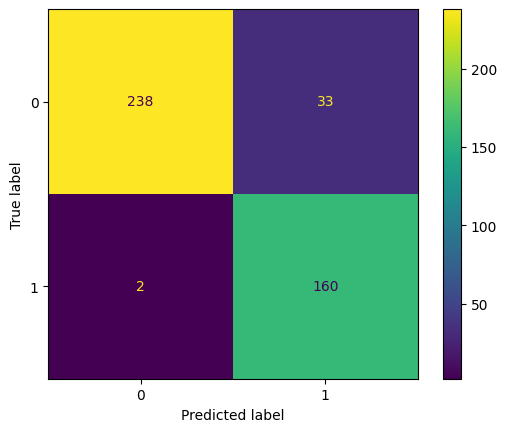

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Random Forest

In [15]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       271
           1       0.94      0.90      0.92       162

    accuracy                           0.94       433
   macro avg       0.94      0.93      0.94       433
weighted avg       0.94      0.94      0.94       433



Hyper-parameter tuning

In [21]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=20, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_test, y_test)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 59}


In [24]:
rf = RandomForestClassifier(n_estimators=387, max_depth=30)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       271
           1       0.94      0.90      0.92       162

    accuracy                           0.94       433
   macro avg       0.94      0.93      0.94       433
weighted avg       0.94      0.94      0.94       433



## KNN pre-trained

KNN model already trained on all Data

In [12]:
import pickle as pk
model = pk.load(open("knn-model.sav", 'rb'))

model.predict([[3.28, 3.54, 2.26]])

array([0])

In [31]:
import pickle as pk
model = pk.load(open("knn-model.sav", 'rb'))

y_pred = model.predict(X)
print(classification_report(y_true=y, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       488
           1       0.72      0.62      0.66       172

    accuracy                           0.84       660
   macro avg       0.79      0.77      0.78       660
weighted avg       0.83      0.84      0.83       660



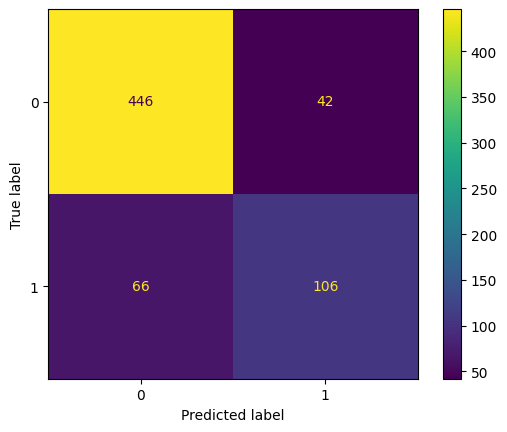

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## SVM pre-trained

In [54]:
import pickle as pk
model = pk.load(open("svm-model.sav", 'rb'))

y_pred = model.predict(X)
print(classification_report(y_true=y, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       488
           1       0.86      0.07      0.13       172

    accuracy                           0.75       660
   macro avg       0.80      0.53      0.49       660
weighted avg       0.78      0.75      0.67       660



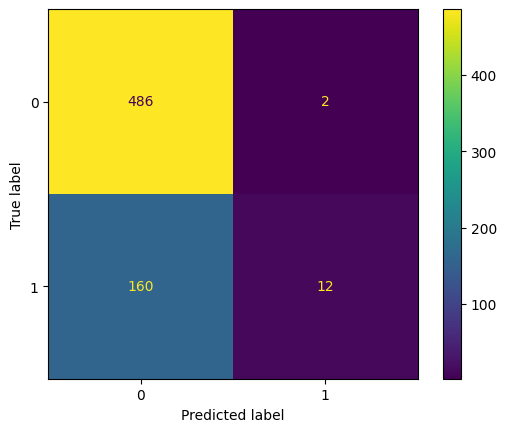

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Random Forest pre-trained

In [35]:
import pickle as pk
model = pk.load(open("random_forest-model.sav", 'rb'))

y_pred = model.predict(X)
print(classification_report(y_true=y, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       488
           1       0.54      0.88      0.67       172

    accuracy                           0.78       660
   macro avg       0.75      0.81      0.75       660
weighted avg       0.84      0.78      0.79       660



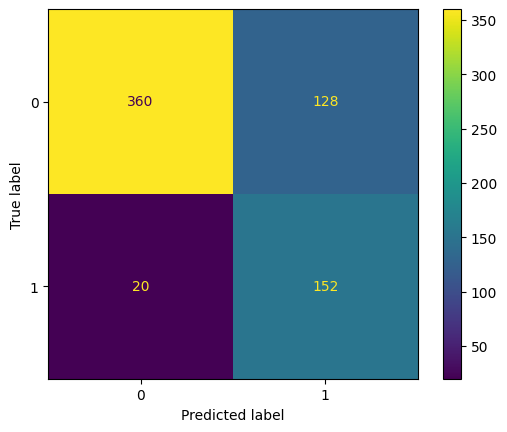

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Analysis

In [30]:
df_ps = pd.read_csv("ps_data.csv")
df_B365 = pd.read_csv("B365_data.csv")

df_B365[df_B365['B365_income_index'] != df_ps['PS_income_index']][['B365H', 'B365D', 'B365A', 'B365H_P',
       'B365D_P', 'B365A_P', 'B365_income_index']]

,B365H,B365D,B365A,B365H_P,B365D_P,B365A_P,B365_income_index
102,1.90,3.75,3.80,49.83,25.25,24.92,0.0
165,3.80,3.80,1.90,25.00,25.00,50.00,0.0
296,4.00,3.60,1.90,23.72,26.35,49.93,0.0
307,4.20,3.50,1.90,22.67,27.21,50.12,1.0
458,1.90,3.60,4.00,49.93,26.35,23.72,0.0
485,4.33,3.30,1.90,21.78,28.58,49.64,0.0
489,4.00,3.60,1.90,23.72,26.35,49.93,0.0
697,4.20,3.40,1.91,22.55,27.86,49.59,0.0
707,1.90,3.60,4.00,49.93,26.35,23.72,0.0
1078,1.90,4.33,3.25,49.42,21.69,28.89,0.0


In [31]:
df_ps[df_B365['B365_income_index'] != df_ps['PS_income_index']][['PSH', 'PSD', 'PSA', 'PSH_P',
       'PSD_P', 'PSA_P', 'PS_income_index']]

,PSH,PSD,PSA,PSH_P,PSD_P,PSA_P,PS_income_index
102,1.93,3.82,4.11,50.64,25.58,23.78,1.0
165,3.83,4.09,1.93,25.50,23.88,50.61,1.0
296,4.44,3.67,1.90,21.99,26.61,51.40,1.0
307,4.39,3.52,1.96,22.29,27.80,49.92,0.0
458,1.94,3.64,4.27,50.32,26.82,22.86,1.0
485,4.75,3.42,1.92,20.56,28.56,50.87,1.0
489,4.39,3.64,1.92,22.26,26.85,50.89,1.0
697,4.54,3.47,1.92,21.40,28.00,50.60,1.0
707,1.93,3.69,4.15,50.30,26.31,23.39,1.0
1078,1.93,4.58,3.42,50.36,21.22,28.42,1.0


## Testing model precision

In [94]:
bm = 'PS'
H = bm + 'H'
D = bm + 'D'
A = bm + 'A'

k = 49.5

def get_best(s):

    h = s.FTHG
    a = s.FTAG

    BH = s[H + '_P']
    BD = s[D + '_P']
    BA = s[A + '_P']


    if BH == max(BH, BD, BA, k) and h > a or \
       BD == max(BH, BD, BA, k) and h == a or \
       BA == max(BH, BD, BA, k) and h < a :
        
        return 1
    
    return 0
#Loading the datasets

filenames = [filename_1, filename_2, filename_3, filename_4,
             filename_5, filename_6, filename_7, filename_8,
             filename_9, filename_10, filename_11, filename_12,
             filename_13, filename_14, filename_15, filename_16,
             filename_17]

tmp_features = ['HomeTeam','AwayTeam','FTHG','FTAG', H, D, A]

df = pd.DataFrame()
for name in filenames:
    tmp = pd.read_csv(name, sep=',')
    df = pd.concat([df, tmp[tmp_features]])
df.shape

In [95]:
df[H + '_P'] = round(100/(1 + df[H]*(1/df[D] + 1/df[A])), 2)
df[A + '_P'] = round(100/(1 + df[A]*(1/df[H] + 1/df[D])), 2)
df[D + '_P'] = round(100/(1 + df[D]*(1/df[H] + 1/df[A])), 2)

features = [H, D, A]
target   = [bm + '_income_index']

df[bm + '_income_index'] = df.apply(get_best, axis=1)
df[bm + '_income_index'].value_counts()
df[df[bm + '_income_index'] == 1][[bm + 'H', bm + 'D', bm + 'A']].apply(lambda x: min(x[bm + 'H'], x[bm + 'D'], x[bm + 'A']), axis=1).mean()
df.dropna(inplace=True)

,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,B365H_P,B365D_P,B365A_P,e_index
9,Juventus,Sassuolo,3,0,1.44,4.75,7.00,66.27,20.09,13.63,0.769556
12,Inter,Spezia,3,0,1.16,8.00,15.00,81.81,11.86,6.33,0.955311
15,Napoli,Monza,4,0,1.33,5.50,8.00,71.02,17.17,11.81,0.858954
26,Salernitana,Sampdoria,4,0,2.45,3.20,3.00,38.73,29.65,31.63,0.466290
32,Roma,Monza,3,0,1.30,5.50,10.00,73.19,17.30,9.51,0.852432
46,Udinese,Roma,4,0,4.20,3.75,1.85,22.78,25.51,51.71,0.272002
73,Lazio,Spezia,4,0,1.40,5.00,7.50,68.18,19.09,12.73,0.816007
76,Sassuolo,Salernitana,5,0,2.00,3.75,3.50,47.51,25.34,27.15,0.577774
78,Juventus,Bologna,3,0,1.50,4.33,6.50,63.40,21.96,14.63,0.738774
100,Juventus,Empoli,4,0,1.40,5.00,7.00,67.57,18.92,13.51,0.816007


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = np.concatenate((df[features].to_numpy(), df[features].to_numpy()))
y = np.concatenate((df[target].to_numpy(),   df[target].to_numpy())).squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create Decision Tree classifer object
clf = KNeighborsClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [x for x in range(1, 35)],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [8]
}

# definizione del metodo di ricerca migliore combinazione di iper-parametri
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, n_jobs=8)

grid_search.fit(X_val, y_val)

# stampa dei migliori parametri e punteggi ottenuti
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

In [ ]:
# Create Decision Tree classifer object
clf = KNeighborsClassifier(algorithm='auto', n_jobs=-1, n_neighbors=35, weights='distance')

# Train Decision Tree Classifer
clf = clf.fit(X, y)

#Predict the response for test dataset
y_pred = clf.predict(X)
print(classification_report(y_true=y, y_pred=y_pred))

In [ ]:
import pickle as pk
pk.dump(clf, open("model.sav", 'wb'))